In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [477]:
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("Test_data.csv")
train_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [478]:
data = train_data.drop("car_insurance",axis= 1).append(test_data)

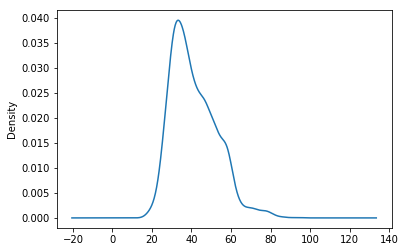

In [419]:
data.age.plot.density()
plt.show()

In [420]:
train_data["age"].describe()

count    3102.000000
mean       41.325847
std        11.517698
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        92.000000
Name: age, dtype: float64

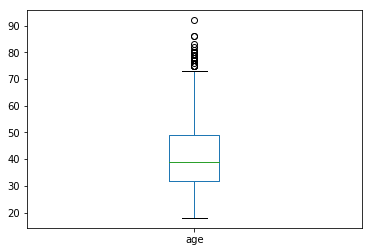

In [421]:
train_data.age.plot.box()
plt.show()

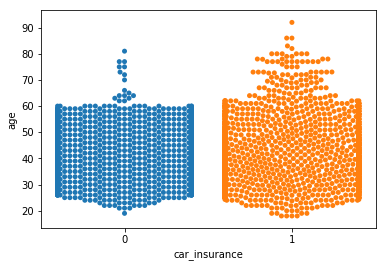

In [116]:
sns.swarmplot(x = "car_insurance",y = "age" , data=train_data)
plt.show()

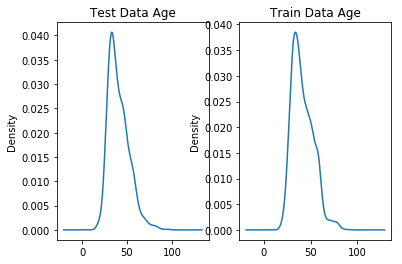

In [363]:
fig ,ax = plt.subplots(1,2)
test_data.age.plot.density(ax = ax[0])
ax[0].set_title("Test Data Age")
train_data.age.plot.density(ax = ax[1])
ax[1].set_title("Train Data Age")
plt.show()

In [422]:
from sklearn.preprocessing import MinMaxScaler

In [423]:
age_scaler = MinMaxScaler()


In [424]:
data["age"] = age_scaler.fit_transform(data[["age"]])

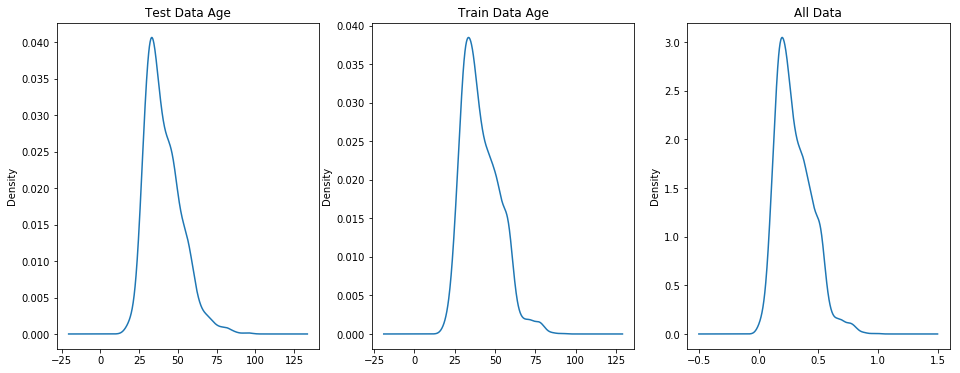

In [425]:
fig ,ax = plt.subplots(1,3,figsize = (16,6))
test_data.age.plot.density(ax = ax[0])
ax[0].set_title("Test Data Age")
train_data.age.plot.density(ax = ax[1])
ax[1].set_title("Train Data Age")
data.age.plot.density(ax = ax[2])
ax[2].set_title("All Data")
plt.show()

In [426]:
data["job_type"].isna().sum()

16

In [479]:
train_data["job_type"].fillna("Not available").value_counts()

management       724
blue-collar      544
technician       526
admin.           346
services         231
retired          193
unemployed       146
student          119
self-employed    106
housemaid         80
entrepreneur      76
Not available     11
Name: job_type, dtype: int64

In [428]:
train_data["job_type"][train_data["car_insurance"] == 1].fillna("Not available").value_counts()

management       453
technician       302
blue-collar      233
admin.           204
retired          136
unemployed       115
services         100
student           89
self-employed     51
housemaid         47
entrepreneur      26
Not available      4
Name: job_type, dtype: int64

In [429]:
job_type_valuecounts = train_data["job_type"].fillna("Not available").value_counts()
job_type_target_count = train_data["job_type"][train_data["car_insurance"] == 1].fillna("Not available").value_counts()
(job_type_target_count/job_type_valuecounts)*100

Not available    36.363636
admin.           58.959538
blue-collar      42.830882
entrepreneur     34.210526
housemaid        58.750000
management       62.569061
retired          70.466321
self-employed    48.113208
services         43.290043
student          74.789916
technician       57.414449
unemployed       78.767123
Name: job_type, dtype: float64

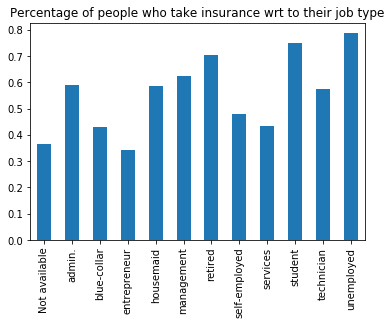

In [234]:
(job_type_target_count/job_type_valuecounts).plot.bar()
plt.title("Percentage of people who take insurance wrt to their job type")
plt.show()


In [480]:
data["job_type"] = data["job_type"].fillna("NAN")

In [481]:
data.marital_status.isna().sum()

0

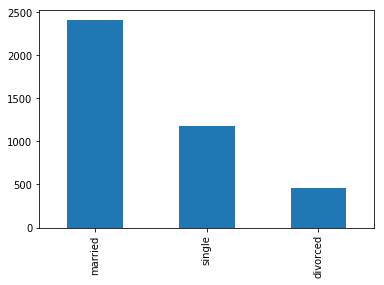

In [482]:
data.marital_status.value_counts().plot.bar()
plt.show()

In [369]:
status_valuecounts = train_data["marital_status"].value_counts()
status_target_count = train_data["marital_status"][train_data["car_insurance"] == 1].value_counts()
(status_target_count/status_valuecounts)*100

married     54.881974
single      60.310421
divorced    57.440476
Name: marital_status, dtype: float64

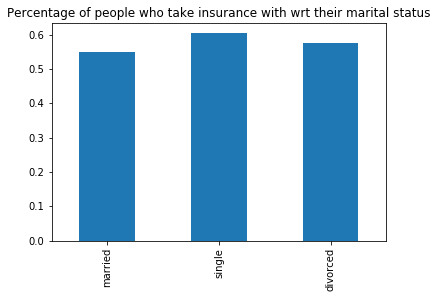

In [239]:
(status_target_count/status_valuecounts).plot.bar()
plt.title("Percentage of people who take insurance with wrt their marital status")
plt.show()

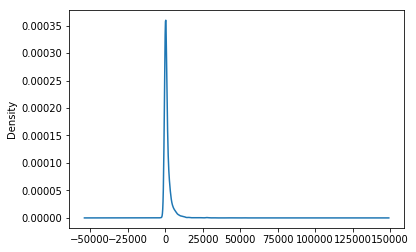

In [240]:
data.balance_amt.plot.density()

In [241]:
data.balance_amt.isna().sum()

0

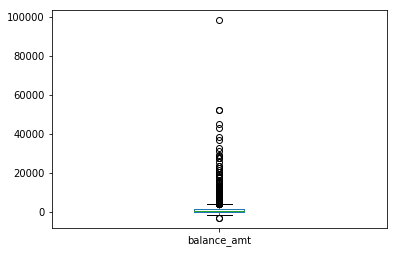

In [242]:
data.balance_amt.plot.box()
plt.show()

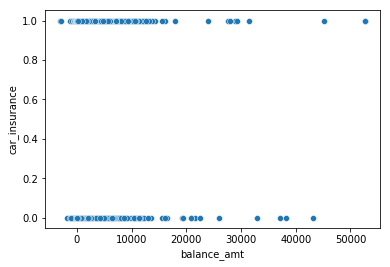

In [243]:
sns.scatterplot(x = "balance_amt",y = "car_insurance" , data=train_data)
plt.show()

In [432]:
data["balance_amt"] = MinMaxScaler().fit_transform(data[["balance_amt"]])

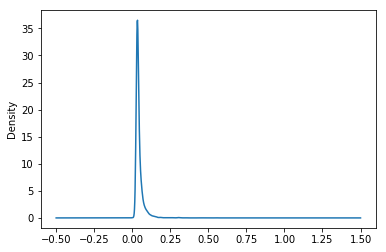

In [433]:
data.balance_amt.plot.density()

In [371]:
data.education_level.isna().sum()

147

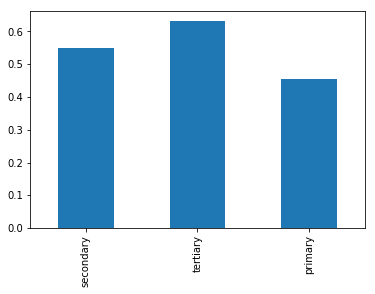

In [372]:
education_level_value_count = train_data["education_level"].value_counts()
education_level_target_count = train_data["education_level"][train_data["car_insurance"] == 1].value_counts()
a = (education_level_target_count/education_level_value_count)
a.plot.bar()
plt.show()

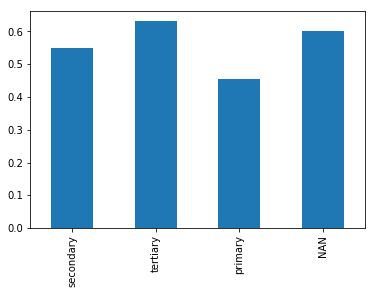

In [373]:
education_level_value_count = train_data["education_level"].fillna("NAN").value_counts()
education_level_target_count = train_data["education_level"][train_data["car_insurance"] == 1].fillna("NAN").value_counts()
a = (education_level_target_count/education_level_value_count)
a.plot.bar()
plt.show()

In [483]:
data["education_level"] = data.education_level.fillna("NAN")

In [484]:
data.default_or_not.value_counts()

0    3984
1      53
Name: default_or_not, dtype: int64

In [485]:
data.default_or_not.isna().sum()

0

In [486]:
data["default_or_not"] = data["default_or_not"].astype("int")

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   int32  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   ob

In [379]:
data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,0.505128,blue-collar,married,primary,0,-0.130344,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29
1,0.420931,management,married,tertiary,0,-0.443230,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48
2,-0.451105,services,single,NAN,0,-0.364441,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16
3,-0.798826,technician,single,secondary,0,-0.291479,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48
4,-0.972686,admin.,single,secondary,0,-0.354863,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14


In [441]:
data[["household_insurance","car_loan"]].isna().sum()

household_insurance    0
car_loan               0
dtype: int64

In [381]:
data[["household_insurance","car_loan"]] = data[["household_insurance","car_loan"]].astype(object)

In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   int32  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   ob

In [443]:
data.communication.isna().sum()

708

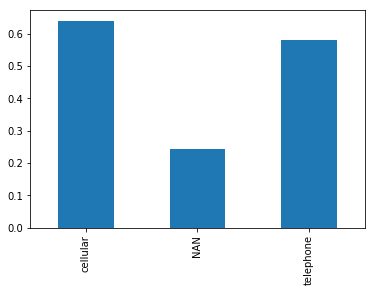

In [383]:
communication_value_count = train_data["communication"].fillna("NAN").value_counts()
communication_target_count = train_data["communication"][train_data["car_insurance"] == 1].fillna("NAN").value_counts()
a = (communication_target_count/communication_value_count)
a.plot.bar()
plt.show()

In [487]:
data["communication"] = data["communication"].fillna("NAN")

In [445]:
train_data["last_contact_month"].isna().sum()

0

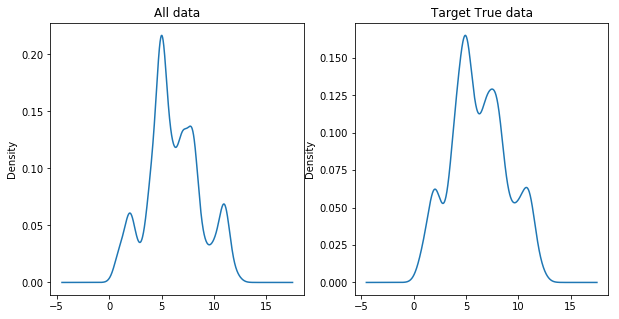

In [386]:
months = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

last_contact_month = train_data["last_contact_month"].map(lambda x: months[x])
last_contact_month_target = train_data["last_contact_month"][train_data["car_insurance"] == 1].map(lambda x: months[x])
# a = (last_contact_month_target_count/last_contact_month_count)
# a.plot.bar()
fig,ax = plt.subplots(1,2,figsize=(10,5))
last_contact_month.plot.density(ax = ax[0])
ax[0].set_title("All data")
last_contact_month_target.plot.density(ax = ax[1])
ax[1].set_title("Target True data")
plt.show()

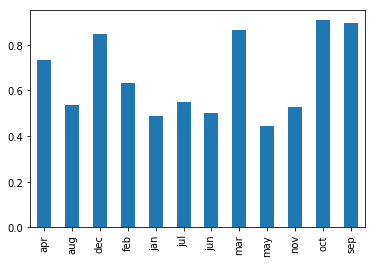

In [387]:
last_contact_month_count = train_data["last_contact_month"].value_counts()
last_contact_month_target_count = train_data["last_contact_month"][train_data["car_insurance"] == 1].value_counts()
a = (last_contact_month_target_count/last_contact_month_count)
a.plot.bar()
plt.show()

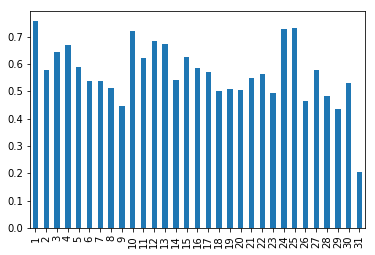

In [263]:
last_contact_day_count = train_data["last_contact_day"].fillna("NAN").value_counts()
last_contact_day_target_count = train_data["last_contact_day"][train_data["car_insurance"] == 1].fillna("NAN").value_counts()
a = (last_contact_day_target_count/last_contact_day_count)
a.plot.bar()
plt.show()

In [264]:
data.columns

Index(['age', 'job_type', 'marital_status', 'education_level',
       'default_or_not', 'balance_amt', 'household_insurance', 'car_loan',
       'communication', 'last_contact_day', 'last_contact_month',
       'no_of_contacts', 'days_passed', 'prev_attempts', 'Outcome',
       'call_start', 'call_end'],
      dtype='object')

In [265]:
contacts = data[['last_contact_day', 'last_contact_month',
       'no_of_contacts', 'days_passed','prev_attempts', 'Outcome']]
contacts.head()

,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome
0,13,may,1,-1,0,NaN
1,15,may,3,219,1,other
2,16,may,1,-1,0,NaN
3,29,jan,1,-1,0,NaN
4,14,may,3,346,4,failure


In [266]:
contacts[contacts["days_passed"] != -1].head()

,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome
1,15,may,3,219,1,other
4,14,may,3,346,4,failure
7,26,aug,1,93,2,failure
14,24,aug,1,83,1,other
26,17,apr,2,280,1,failure


In [267]:
train_data[(train_data["days_passed"] == -1) & train_data.car_insurance ==1 ].head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


In [268]:
contacts["last_contact_day"].astype(str).unique()

array(['13', '15', '16', '29', '14', '7', '9', '26', '21', '19', '20',
       '24', '25', '2', '30', '6', '10', '17', '28', '3', '27', '23',
       '11', '18', '8', '22', '1', '5', '12', '4', '31'], dtype=object)

In [269]:
contacts["last_contact"] = contacts["last_contact_month"]+"-"+contacts["last_contact_day"].astype("str")

In [270]:

contacts["last_contact"] = pd.to_datetime(contacts["last_contact"],format='%b-%d')

In [271]:

contacts["days_passed1"] = contacts["last_contact"].max()- contacts["last_contact"]

In [272]:

contacts["days_passed1"].corr(contacts["days_passed"])

TypeError: reduction operation 'corr' not allowed for this dtype

In [273]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   last_contact_day    4037 non-null   int64          
 1   last_contact_month  4037 non-null   object         
 2   no_of_contacts      4037 non-null   int64          
 3   days_passed         4037 non-null   int64          
 4   prev_attempts       4037 non-null   int64          
 5   Outcome             991 non-null    object         
 6   last_contact        4037 non-null   datetime64[ns] 
 7   days_passed1        4037 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), int64(4), object(2), timedelta64[ns](1)
memory usage: 283.9+ KB


In [274]:
contacts["days_passed1"] = contacts["days_passed1"]/np.timedelta64(1, 'D')

In [275]:
contacts_sub = contacts[contacts["days_passed"] != -1]
contacts_sub["days_passed1"].corr(contacts_sub["days_passed"])

0.14571874461316506

In [276]:
train_sub = train_data[['last_contact_day', 'last_contact_month',
        'days_passed','car_insurance']]
train_sub.head()

,last_contact_day,last_contact_month,days_passed,car_insurance
0,13,may,-1,0
1,15,may,219,1
2,16,may,-1,1
3,29,jan,-1,1
4,14,may,346,1


In [277]:
train_sub["last_contact"] = train_sub["last_contact_month"]+"-"+train_sub["last_contact_day"].astype("str")
train_sub["last_contact"] = pd.to_datetime(train_sub["last_contact"],format='%b-%d')
train_sub["days_passed1"] = train_sub["last_contact"].max()- train_sub["last_contact"]
train_sub["days_passed1"] = train_sub["days_passed1"]/np.timedelta64(1, 'D')


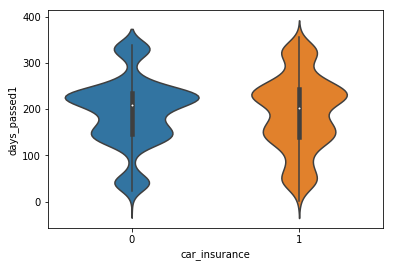

In [278]:
sns.violinplot(train_sub["car_insurance"],train_sub["days_passed1"])
plt.show()

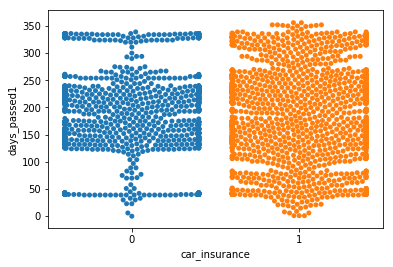

In [100]:
sns.swarmplot(train_sub["car_insurance"],train_sub["days_passed1"])
plt.show()

In [279]:
len(train_sub[(train_sub["days_passed"] == -1) & (train_sub["car_insurance"] == 1)])/len(train_sub[train_sub["days_passed"] == -1]) 

0.4993240198287517

In [488]:
data.drop("days_passed",inplace = True,axis=1)

In [489]:
data["last_contact"] = data["last_contact_month"]+"-"+data["last_contact_day"].astype("str")
data["last_contact"] = pd.to_datetime(data["last_contact"],format='%b-%d')
data["days_passed1"] = data["last_contact"].max()- data["last_contact"]
data["days_passed1"] = data["days_passed1"]/np.timedelta64(1, 'D')

In [447]:
data.drop(["last_contact"],inplace = True,axis =1)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   object 
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   object 
 7   car_loan             4037 non-null   object 
 8   communication        4037 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  prev_attempts        4037 non-null   int64  
 13  Outcome              991 non-null    object 
 14  call_start           4037 non-null   object 
 15  call_end             4037 non-null   ob

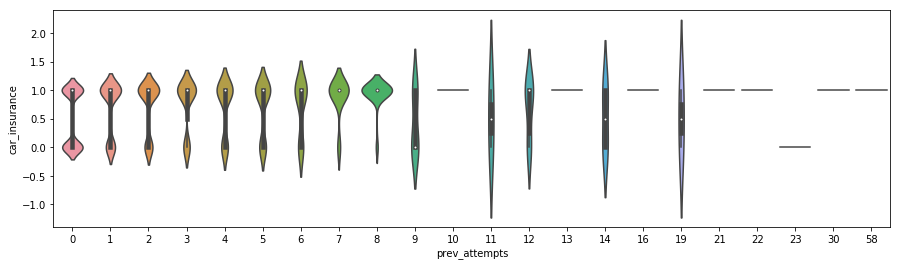

In [284]:
plt.figure(figsize=(15,4))
sns.violinplot(train_data.prev_attempts,train_data.car_insurance)
plt.show()

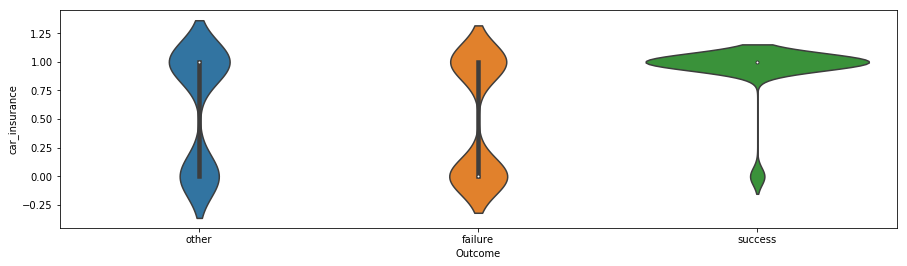

In [285]:
plt.figure(figsize=(15,4))
sns.violinplot(train_data.Outcome,train_data.car_insurance)
plt.show()

In [286]:
train_data.Outcome.unique()

array([nan, 'other', 'failure', 'success'], dtype=object)

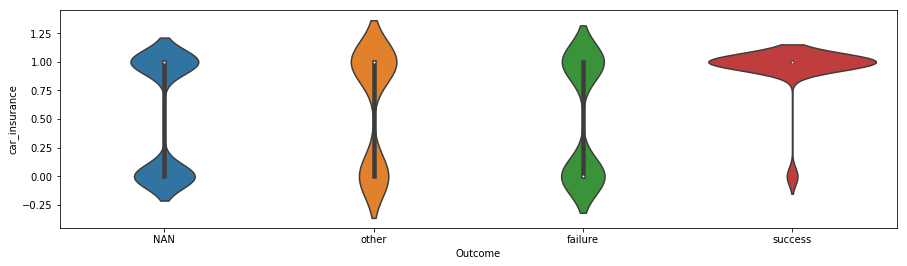

In [287]:
plt.figure(figsize=(15,4))
sns.violinplot(train_data.Outcome.fillna("NAN"),train_data.car_insurance)
plt.show()

In [490]:
data["outcome"] = data.Outcome.fillna("NAN")
data.drop("Outcome",axis =1 ,inplace = True)

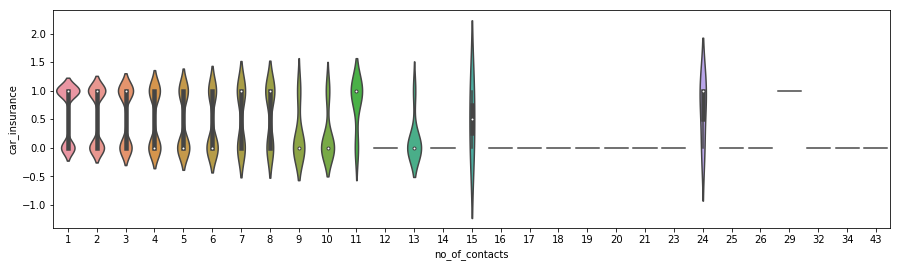

In [289]:
plt.figure(figsize=(15,4))
sns.violinplot(train_data.no_of_contacts,train_data.car_insurance)
plt.show()

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   object 
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   object 
 7   car_loan             4037 non-null   object 
 8   communication        4037 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  no_of_contacts       4037 non-null   int64  
 11  prev_attempts        4037 non-null   int64  
 12  call_start           4037 non-null   object 
 13  call_end             4037 non-null   object 
 14  days_passed1         4037 non-null   float64
 15  outcome              4037 non-null   ob

In [491]:
data["call_duration"] = pd.to_datetime(data["call_end"])-pd.to_datetime(data["call_start"])

In [492]:

data["call_duration"] =  data["call_duration"].dt.total_seconds()

In [493]:
(data["call_duration"]<0).sum()

171

In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  4037 non-null   float64       
 1   job_type             4037 non-null   object        
 2   marital_status       4037 non-null   object        
 3   education_level      4037 non-null   object        
 4   default_or_not       4037 non-null   int32         
 5   balance_amt          4037 non-null   float64       
 6   household_insurance  4037 non-null   int64         
 7   car_loan             4037 non-null   int64         
 8   communication        4037 non-null   object        
 9   last_contact_day     4037 non-null   int64         
 10  last_contact_month   4037 non-null   object        
 11  no_of_contacts       4037 non-null   int64         
 12  prev_attempts        4037 non-null   int64         
 13  call_start           4037 non-null

In [495]:
data["call_duration"].describe()

count     4037.000000
mean      1459.786227
std       7443.212804
min     -30093.000000
25%        135.000000
50%        280.000000
75%        663.000000
max      29878.000000
Name: call_duration, dtype: float64

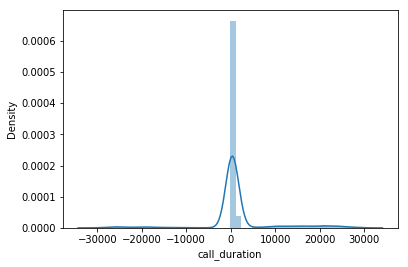

In [295]:
sns.distplot(data["call_duration"])
plt.show()

In [455]:
train_data["call_duration"] = pd.to_datetime(train_data["call_end"])-pd.to_datetime(train_data["call_start"])
train_data["call_duration"] =  train_data["call_duration"].dt.total_seconds()

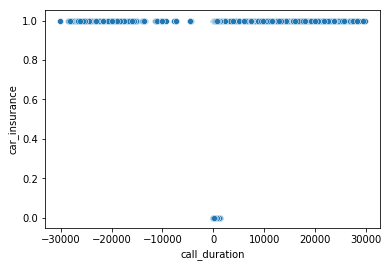

In [297]:

sns.scatterplot(train_data.call_duration,train_data.car_insurance)
plt.show()

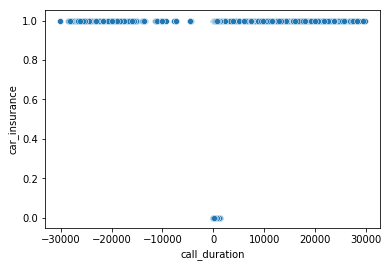

In [476]:
sns.scatterplot(train_data.call_duration,train_data.car_insurance)
plt.show()

In [457]:
data["call_duration"] = StandardScaler().fit_transform(data[["call_duration"]])

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   object 
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   object 
 7   car_loan             4037 non-null   object 
 8   communication        4037 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  no_of_contacts       4037 non-null   int64  
 11  prev_attempts        4037 non-null   int64  
 12  call_start           4037 non-null   object 
 13  call_end             4037 non-null   object 
 14  days_passed1         4037 non-null   float64
 15  outcome              4037 non-null   ob

In [496]:
data.drop(["call_end","call_start"],axis = 1 ,inplace = True)

In [301]:
data.drop(["last_contact_day"],axis = 1 ,inplace = True)

In [459]:
data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,days_passed1,call_duration
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4.037000e+03
mean,0.301159,0.013129,0.045654,0.459995,0.117414,15.330196,2.386426,52.065891,0.790686,191.703493,3.760100e-17
std,0.149414,0.113839,0.034986,0.498459,0.321953,8.165424,2.696728,107.666216,2.166401,78.140401,1.000124e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-4.239660e+00
25%,0.181818,0.000000,0.031328,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,141.000000,-1.780079e-01
50%,0.272727,0.000000,0.035989,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,207.000000,-1.585246e-01
75%,0.402597,0.000000,0.047253,1.000000,0.000000,21.000000,3.000000,68.000000,1.000000,237.000000,-1.070620e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,356.000000,3.818477e+00


In [460]:
from sklearn.preprocessing import MinMaxScaler
data[["no_of_contacts","prev_attempts","days_passed1","last_contact_day"]] = MinMaxScaler().fit_transform(data[["no_of_contacts","prev_attempts","days_passed1","last_contact_day"]])

In [461]:
data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,days_passed1,call_duration
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4.037000e+03
mean,0.301159,0.013129,0.045654,0.459995,0.117414,0.477673,0.033010,52.065891,0.013633,0.538493,3.760100e-17
std,0.149414,0.113839,0.034986,0.498459,0.321953,0.272181,0.064208,107.666216,0.037352,0.219496,1.000124e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-4.239660e+00
25%,0.181818,0.000000,0.031328,0.000000,0.000000,0.233333,0.000000,-1.000000,0.000000,0.396067,-1.780079e-01
50%,0.272727,0.000000,0.035989,0.000000,0.000000,0.466667,0.023810,-1.000000,0.000000,0.581461,-1.585246e-01
75%,0.402597,0.000000,0.047253,1.000000,0.000000,0.666667,0.047619,68.000000,0.017241,0.665730,-1.070620e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,854.000000,1.000000,1.000000,3.818477e+00


In [512]:
data.shape

(4037, 17)

In [513]:
train_data.shape

(3102, 18)

In [514]:
test_data.shape

(935, 17)

In [515]:
data = pd.get_dummies(data)

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 934
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   F0                4037 non-null   float64       
 1   F4                4037 non-null   int32         
 2   F5                4037 non-null   float64       
 3   F6                4037 non-null   int64         
 4   F7                4037 non-null   int64         
 5   F9                4037 non-null   int64         
 6   F11               4037 non-null   int64         
 7   F12               4037 non-null   int64         
 8   F13               4037 non-null   datetime64[ns]
 9   F14               4037 non-null   float64       
 10  F16               4037 non-null   float64       
 11  F1_NAN            4037 non-null   uint8         
 12  F1_admin.         4037 non-null   uint8         
 13  F1_blue-collar    4037 non-null   uint8         
 14  F1_entrepreneur   4037 no

In [517]:
data.drop("F13",axis = 1 ,inplace = True)

In [518]:
data.columns = ["F{}".format(x) for x in range(data.shape[1])]

In [519]:
train_data_processed = data.iloc[:train_data.shape[0]]

In [520]:
train_data_processed.shape

(3102, 48)

In [521]:

test_data_processed = data.iloc[train_data.shape[0]:]

In [522]:
test_data_processed.shape

(935, 48)

In [523]:
train_data_processed.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,47.000000,0,1112.000000,1,0,13,1,0,231.0,129.0,...,0,0,1,0,0,0,1,0,0,0
1,46.031442,0,1.312372,0,1,15,3,1,229.0,17598.0,...,0,0,1,0,0,0,0,0,1,0
2,36.000000,0,281.000000,1,0,16,1,0,228.0,515.0,...,0,0,1,0,0,0,1,0,0,0
3,32.000000,0,540.000000,0,1,29,1,0,335.0,750.0,...,0,0,0,0,0,0,1,0,0,0
4,30.000000,0,315.000000,1,0,14,3,4,230.0,884.0,...,0,0,1,0,0,0,0,1,0,0


In [524]:
test_data_processed.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,65.000000,0,20806.0,0,0,8,2,0,266.0,523.0,...,0,0,0,0,0,0,1,0,0,0
1,36.000000,0,900.0,1,0,15,2,0,229.0,475.0,...,0,0,1,0,0,0,1,0,0,0
2,37.000000,0,6771.0,0,0,7,1,1,114.0,337.0,...,0,0,0,0,0,1,0,0,0,1
3,30.065066,0,0.0,0,0,14,2,0,230.0,-27933.0,...,0,0,1,0,0,0,1,0,0,0
4,41.000000,0,328.0,1,0,29,12,0,154.0,65.0,...,0,0,0,0,0,0,1,0,0,0


In [525]:

train_data_processed["Target"] = train_data["car_insurance"] 

In [526]:

train_data_processed.to_csv("train_data_processed_3.csv",index = False)
test_data_processed.to_csv("test_data_processed_3.csv",index = False)

In [511]:
data.shape

(4037, 17)

In [340]:
from sklearn.decomposition import PCA

In [351]:
pca = PCA(0.999)

In [352]:
data_ = pca.fit_transform(data)

In [353]:
data_.shape

(4037, 28)

In [354]:
data_ = pd.DataFrame(data)

In [355]:
train_data_processed = data_.iloc[:train_data.shape[0]]
test_data_processed = data_.iloc[train_data.shape[0]:]
train_data_processed["Target"] = train_data["car_insurance"] 
train_data_processed.to_csv("red_train_data_processed.csv",index = False)
test_data_processed.to_csv("red_test_data_processed.csv",index = False)